In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv(r'C:/Users/ashuo/DNS/data/generated_dataset_from_dns_response.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   full_domain                 338 non-null    object 
 1   tld                         338 non-null    object 
 2   full_domain_length          338 non-null    int64  
 3   domain_length               338 non-null    int64  
 4   has_subdomain               338 non-null    int64  
 5   subdomain_length            338 non-null    int64  
 6   subdomains_count            338 non-null    float64
 7   avg_subdomain_length        338 non-null    float64
 8   entropy_of_domain           338 non-null    float64
 9   avg_entropy_of_subdomains   338 non-null    float64
 10  alphanumeric_ratio          338 non-null    float64
 11  numeric_ratio               338 non-null    float64
 12  special_char_ratio          338 non-null    float64
 13  label                       338 non

#Dropping the columns that are not required


In [31]:
columns_to_be_dropped = [col for col in df.columns if col.startswith('NS')]
#columns_to_be_dropped.append('full_domain')
#columns_to_be_dropped.append('tld')
df = df.drop(columns_to_be_dropped, axis=1)
df.head(3)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   full_domain                 338 non-null    object 
 1   tld                         338 non-null    object 
 2   full_domain_length          338 non-null    int64  
 3   domain_length               338 non-null    int64  
 4   has_subdomain               338 non-null    int64  
 5   subdomain_length            338 non-null    int64  
 6   subdomains_count            338 non-null    int64  
 7   avg_subdomain_length        338 non-null    float64
 8   entropy_of_domain           338 non-null    float64
 9   avg_entropy_of_subdomains   338 non-null    float64
 10  alphanumeric_ratio          338 non-null    float64
 11  numeric_ratio               338 non-null    float64
 12  special_char_ratio          338 non-null    float64
 13  label                       338 non

In [ ]:
#columns_to_drop = ['full_domian','tld','ipv4_address','ipv6_address',]

In [34]:
df['has_organization_name'] = df['organization_name'].notnull()
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   full_domain                 338 non-null    object 
 1   tld                         338 non-null    object 
 2   full_domain_length          338 non-null    int64  
 3   domain_length               338 non-null    int64  
 4   has_subdomain               338 non-null    int64  
 5   subdomain_length            338 non-null    int64  
 6   subdomains_count            338 non-null    int64  
 7   avg_subdomain_length        338 non-null    float64
 8   entropy_of_domain           338 non-null    float64
 9   avg_entropy_of_subdomains   338 non-null    float64
 10  alphanumeric_ratio          338 non-null    float64
 11  numeric_ratio               338 non-null    float64
 12  special_char_ratio          338 non-null    float64
 13  label                       338 non

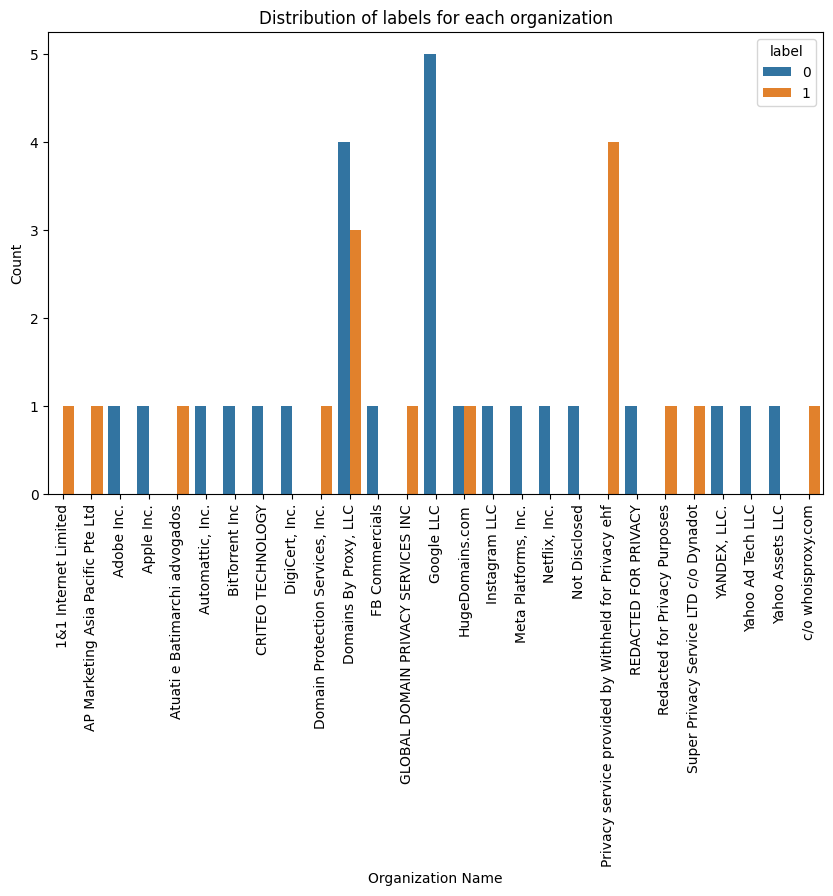

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

temp = df.head(50)
# Group the data and count the number of labels for each organization
grouped_df = temp.groupby(['organization_name', 'label']).size().reset_index(name='count')

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='organization_name', y='count', hue='label', data=grouped_df)

plt.title('Distribution of labels for each organization')
plt.xlabel('Organization Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()